"""
HW02: Exploring and Visualizing Data
Name: Jarret Angbazo
Date: 11 September, 2025
"""

# Introduction
The United States experiences far more mass shooting events than any other developed country in the world. While policymakers, politicians, the media, activists, and the general public recognize the widespread prevalence of these tragic events, policies intended to stop these events should be grounded in evidence and empirical data. Regrettably, mass shootings are not well-documented in the United States, and generalizable data is difficult to collect.

In July 2012, in the aftermath of a mass shooting in a movie theater in Aurora, Colorado, [Mother Jones](https://www.motherjones.com/politics/2012/07/mass-shootings-map/) published a report on mass shootings in the United States since 1982. Importantly, they provided the underlying data set as an [open-source database](https://www.motherjones.com/politics/2012/12/mass-shootings-mother-jones-full-data/) for anyone interested in studying and understanding this criminal behavior.

We use the data provided by Mother Jones to explore and visualize data on mass shootings in the United States from 1982-2025. 

In [109]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import calendar

# Load and explore data
original = pd.read_csv('data/mother_jones_mass_shooting_data.csv')
#original

# Preliminary Data Cleaning
We begin our analysis by first completing the critical step of initial data cleaning and variable standardization. We perform the following initial data cleaning steps:

- **Location:** We convert abbreviated state names to full state names, standardize spelling, and capitalize city and state values.
- **Date:** We convert the date variable to a standardized format, YYYY-MM-DD. We then create separate month, day, and year variables.
- **Location.1:** We remove extraneous characters from the location type values and standardize spelling and casing.
- **Prior_Signs_Mental_Health_Issues:** We standardize spelling and case and removeRa blank spaces.
- **Weapons_Obtained_Legally:** We standardize spelling and case, remove blank spaces, and remove extraneous characters (e.g., '\n').
- **Race:** We standardize spelling and case, remove blank spaces, and remove extraneous characters (e.g., '\n').
- **Gender:** We standardize categories by combining 'M'/'Male' to 'Male', 'F'/'Female' to 'Female' and all other responses to 'Other'.
- **Type:** We standardize spelling and case.

Some variables, including those described above, require additional cleaning. The steps taken to reach the final cleaned variable will be described further below.

## Additional Cleaning
- **Gender:** Attacks carried out by both a male and female shooter were categorized as "Male & Female".
- **Multi_Shooter:** Attacks carried out by more than one shooter were flagged 'Yes' for Multi_Shooter.

In [116]:
# Preliminary Data Cleaning
df = original

# Clean 'location' - split location by city/state; standardize state by using full state names
df[['city_clean','state_clean']] = df['location'].str.split(',', expand=True)

## City
df['city_clean'] = df['city_clean'].str.strip().str.upper()

## State
st_abbrev = {
    'TX': 'TEXAS',
    'MT': 'MONTANA', 
    'NY': 'NEW YORK',
    'NV': 'NEVADA',
    'D.C.': 'DISTRICT OF COLUMBIA'
}

df['state_clean'] = df['state_clean'].str.strip().str.upper().replace(st_abbrev)
#print(df['state_clean'].value_counts().sort_index())


# Clean 'date' - split into month/day/year
# Extract Day/Month/Year from date
df['date_clean'] = pd.to_datetime(df['date'], format='mixed')
df['date_mo'] = df['date_clean'].dt.strftime('%b')
df['date_day'] = df['date_clean'].dt.day
df['date_yr'] = df['date_clean'].dt.year

# Clean 'fatalities', 'injured', and 'total_victims'
df['total_victim_flag'] = (df['fatalities'] + df['injured']) != df['total_victims']
flagged_cases = df[df['total_victim_flag']]
print(f"Number of cases where assertion fails: {df['total_victim_flag'].sum()}")
#print(f"Total cases: {len(df)}")
#if df['total_victim_flag'].sum() > 0:
#    print("Cases where fatalities + injured ≠ total_victims:")
#    print(df[df['total_victim_flag']][['fatalities', 'injured', 'total_victims']])
#else:
#    print("All cases pass the assertion check!")
#problem_cases = df[df['total_victim_flag']][['fatalities', 'injured', 'total_victims']]
#if len(problem_cases) > 0:
#    print("Problematic cases:")
#    print(problem_cases)

# Rename 'location.1' to 'loc_type'; clean category names -- remove '\n' string and capitalize response values
#df = df.rename(columns={'location.1': 'loc_type'})
df['loc_type_clean'] = df['location.1'].str.replace('\n', '').str.capitalize()
#print(df['loc_type_clean'].value_counts())

# Clean 'prior_signs_mental_health_issues - capitalize response values
df['prior_mh_issues_clean'] = df['prior_signs_mental_health_issues'].str.capitalize().str.strip()
#print(df['prior_mh_issues_clean'].value_counts())

# Clean 'weapons_obtained_legally'
df['weapons_legal_clean'] = df['weapons_obtained_legally'].str.strip().str.replace('\n','').str.capitalize()
#print(df['weapons_legal_clean'].value_counts())

# Clean 'race'
df['race_clean'] = df['race'].str.strip().str.replace('\n','').str.capitalize()
#print(df['race_clean'].value_counts())

# Clean 'gender'
#df['gender_clean'] = df['gender'].replace({'M': 'Male', 'F': 'Female'})
def categorize_gender(value):
    if value in ['M', 'Male']:
        return 'Male'
    elif value in ['F', 'Female']:
        return 'Female'
    elif value == 'Male & Female':
        return 'Male & Female'
    else:
        return 'Other'
df['gender_clean'] = df['gender'].apply(categorize_gender)

#print(df['gender_clean'].value_counts().sort_index())
#print(original['gender'].value_counts().sort_index())

# Clean type
df['type_clean'] = df['type'].str.capitalize()
#print(df['type_clean'].value_counts(dropna=False))



# Show a few examples of what we created
#print("Sample of cleaned data:")
#print(df[['location', 'city_clean', 'state_clean', 'date', 'date_clean', 'date_mo', 'date_day', 'date_yr', 'location.1', 'loc_type_clean', 'prior_signs_mental_health_issues', 'prior_mh_issues_clean',
#         'weapons_obtained_legally','weapons_legal_clean','race','race_clean','gender','gender_clean','type','type_clean']].sample(10))

#df.sample(20)


Number of cases where assertion fails: 0


# Preliminary Data Cleaning

We begin our analysis by inspecting and cleaning our dataframe.

In [4]:
# Task 1: Data Cleaning

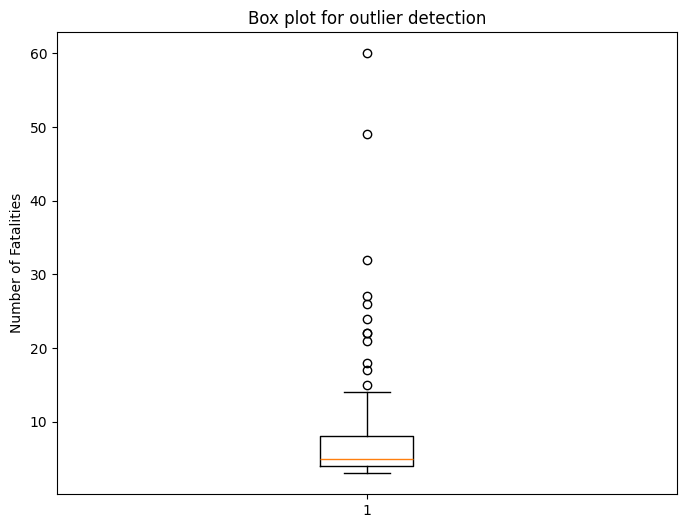

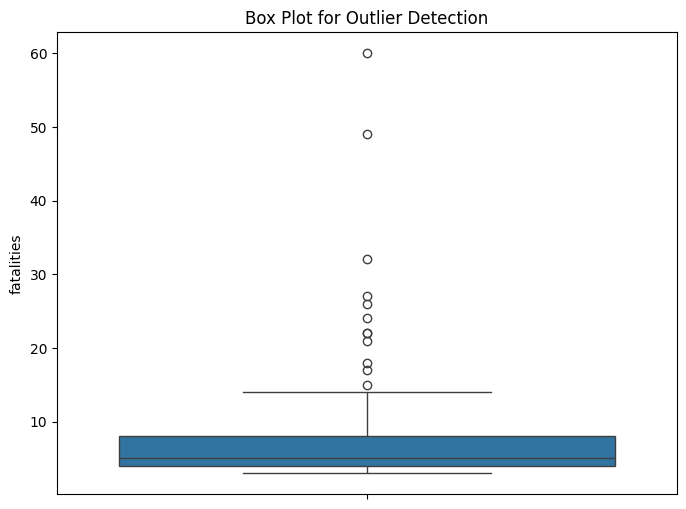

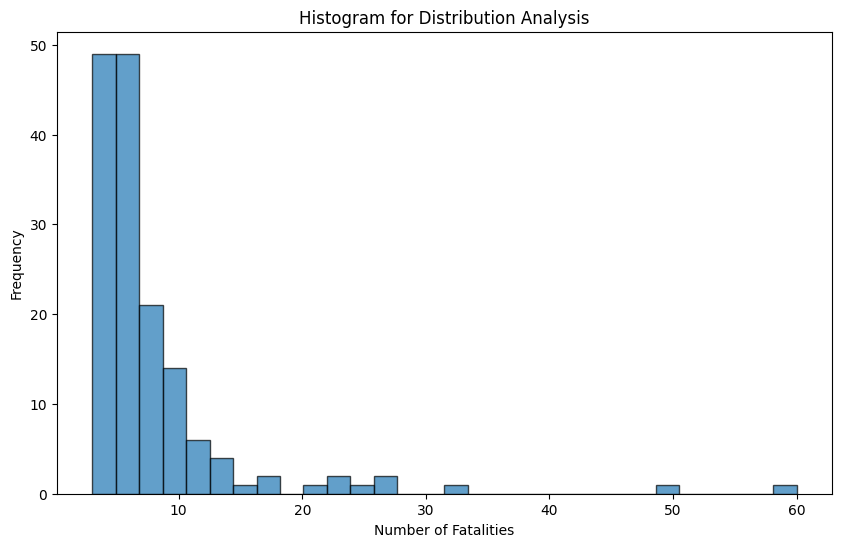

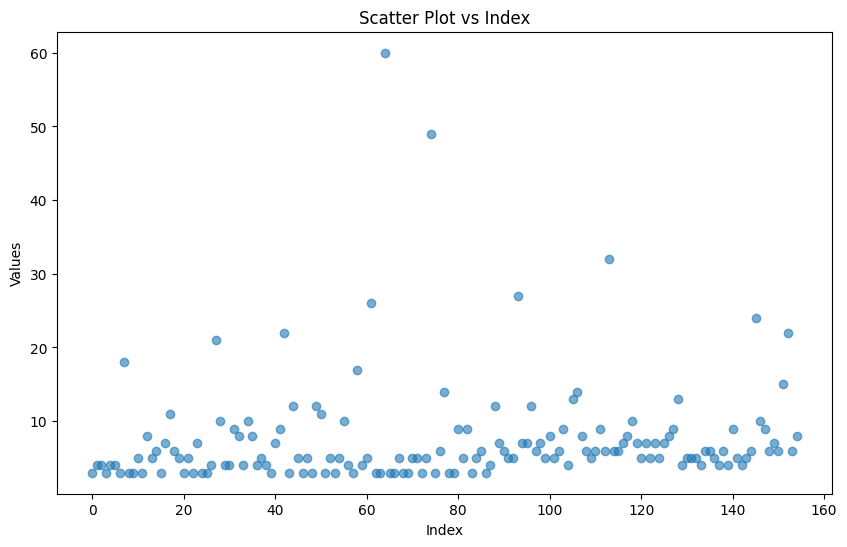

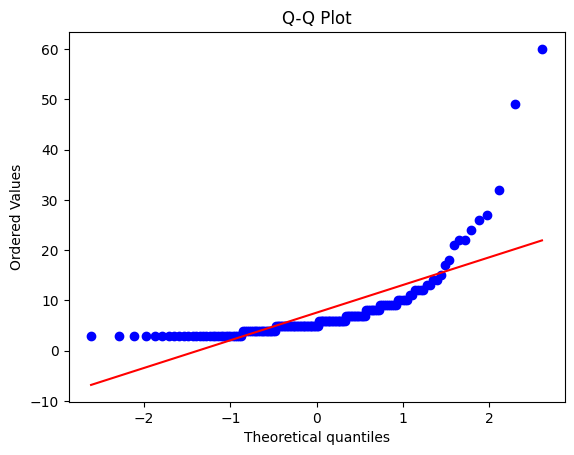

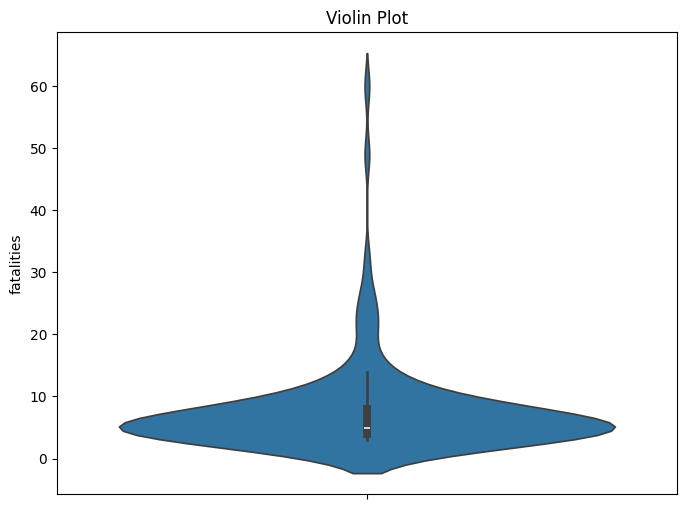

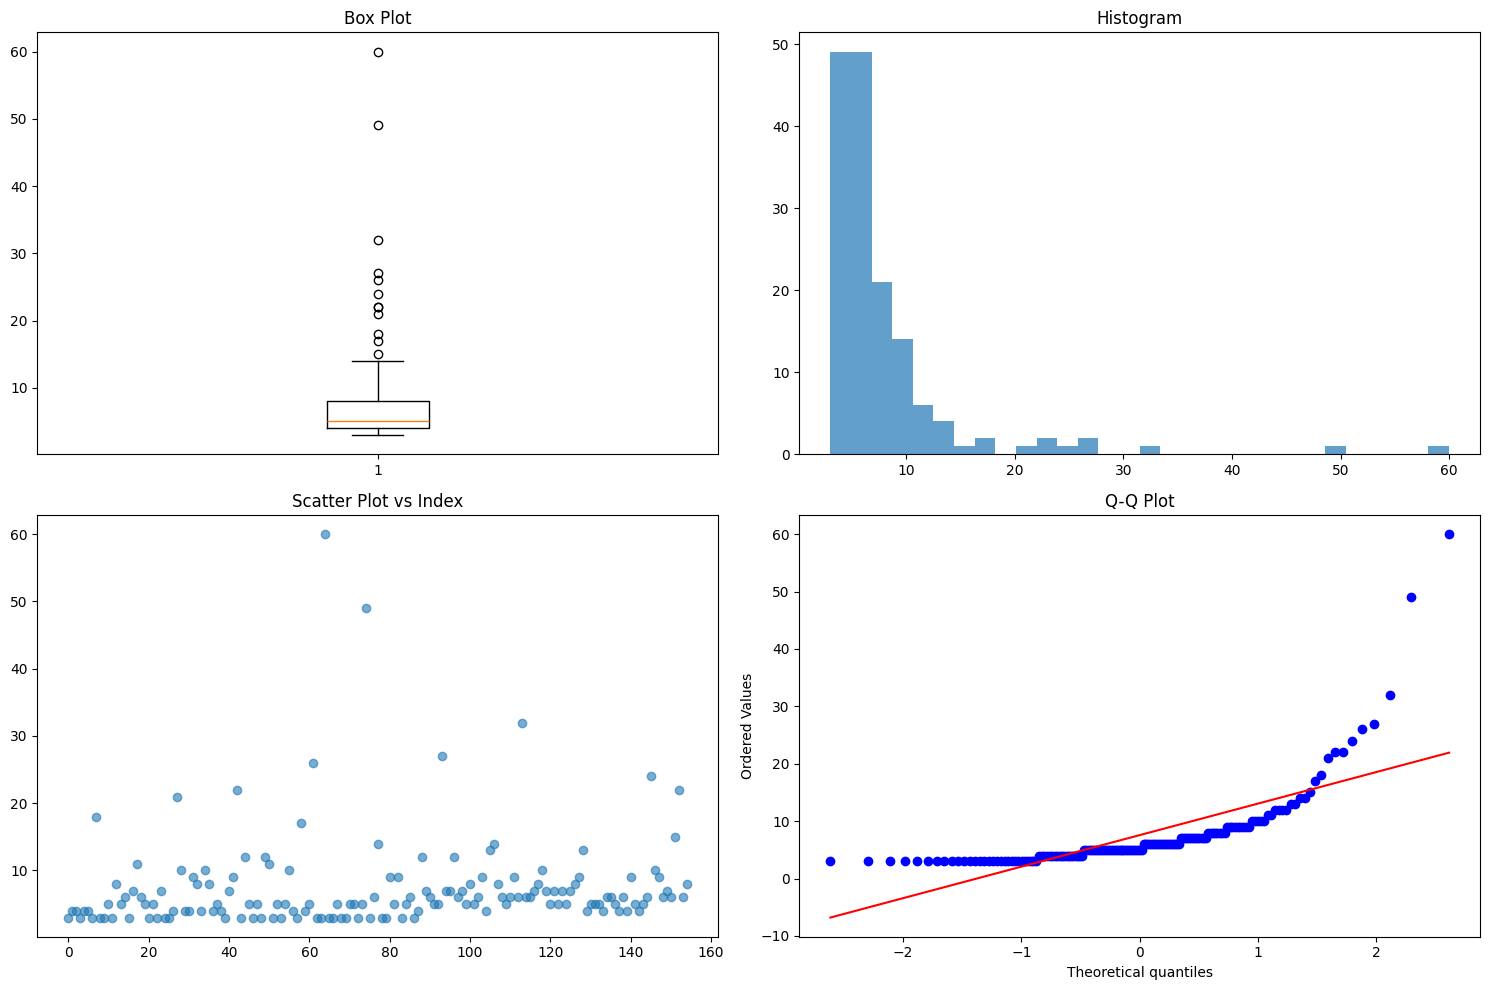

In [49]:
# Task 2: Data Visualization

plt.figure(figsize=(8,6))
plt.boxplot(df['fatalities'])
plt.title('Box plot for outlier detection')
plt.ylabel('Number of Fatalities')
plt.show()

# Using seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['fatalities'])
plt.title('Box Plot for Outlier Detection')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(df['fatalities'], bins=30, alpha=0.7, edgecolor='black')
plt.title('Histogram for Distribution Analysis')
plt.xlabel('Number of Fatalities')
plt.ylabel('Frequency')
plt.show()

# Scatter Plot vs. Index
plt.figure(figsize=(10, 6))
plt.scatter(range(len(df)), df['fatalities'], alpha=0.6)
plt.title('Scatter Plot vs Index')
plt.xlabel('Index')
plt.ylabel('Values')
plt.show()

# Q-Q Plot
stats.probplot(df['fatalities'], dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

# Violin Plot
plt.figure(figsize=(8, 6))
sns.violinplot(y=df['fatalities'])
plt.title('Violin Plot')
plt.show()

# Multiple plots at once
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Box plot
axes[0, 0].boxplot(df['fatalities'])
axes[0, 0].set_title('Box Plot')

# Histogram
axes[0, 1].hist(df['fatalities'], bins=30, alpha=0.7)
axes[0, 1].set_title('Histogram')

# Scatter plot
axes[1, 0].scatter(range(len(df)), df['fatalities'], alpha=0.6)
axes[1, 0].set_title('Scatter Plot vs Index')

# Q-Q plot
stats.probplot(df['fatalities'], dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot')

plt.tight_layout()
plt.show()

In [ ]:
# Conclusions